In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape

(32560, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

Here we got unique values and we have to replace it wiyh 'unknown'

In [8]:
columns = ['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
for column in columns:
    df[column] = df[column].str.strip()

In [9]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' +str(df[column].nunique()))
        print(df[column].value_counts())
        print('_______________________________________________')

Workclass : 9
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64
_______________________________________________
Education : 16
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
_______________________________________________
Marital_status : 7
Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-

In [10]:
change_columns = ['Workclass', 'Occupation', 'Native_country']
for column in change_columns:
        df[column] = df[column].replace({'?': 'Unknown'})

In [11]:
df.Workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

we have replace unique values

In [12]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


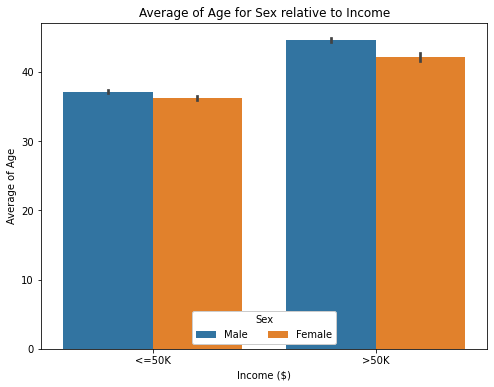

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=[8,6])
ax = sns.barplot(data = df, x = 'Income', y = 'Age', hue = 'Sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Age');

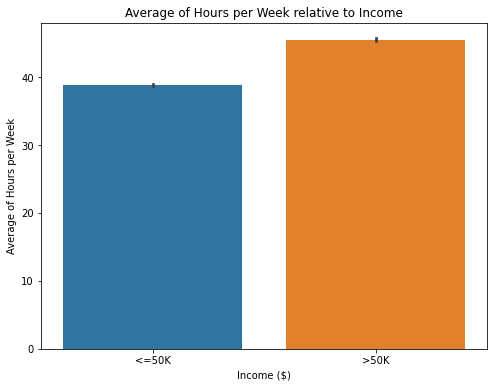

In [14]:
plt.figure(figsize=[8,6])
sns.barplot(data=df, x='Income', y='Hours_per_week')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Hours per Week');

In [15]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


<AxesSubplot:>

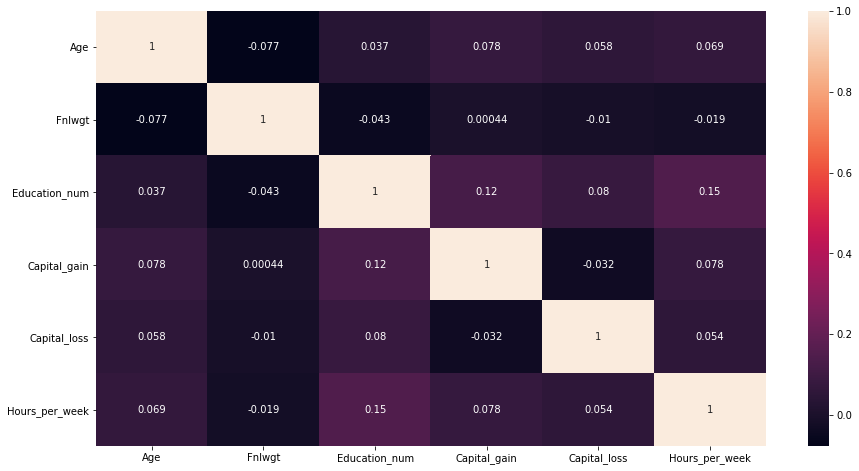

In [16]:
plt.figure(figsize=[15,8])
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Income', ylabel='count'>

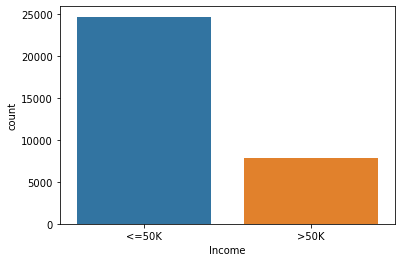

In [17]:
sns.countplot(x='Income',data=df)

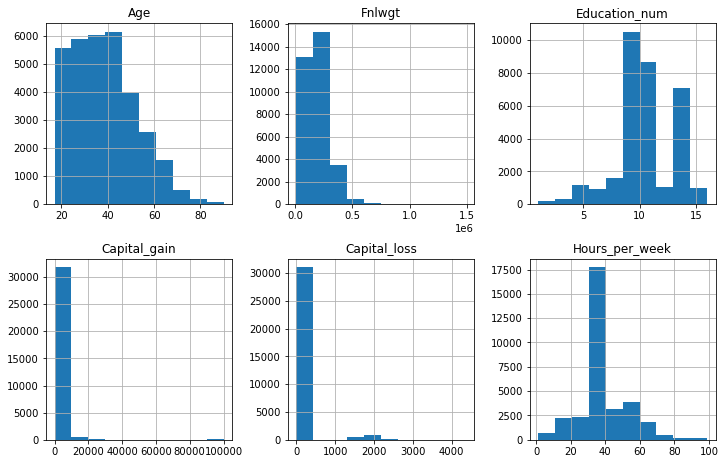

In [18]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

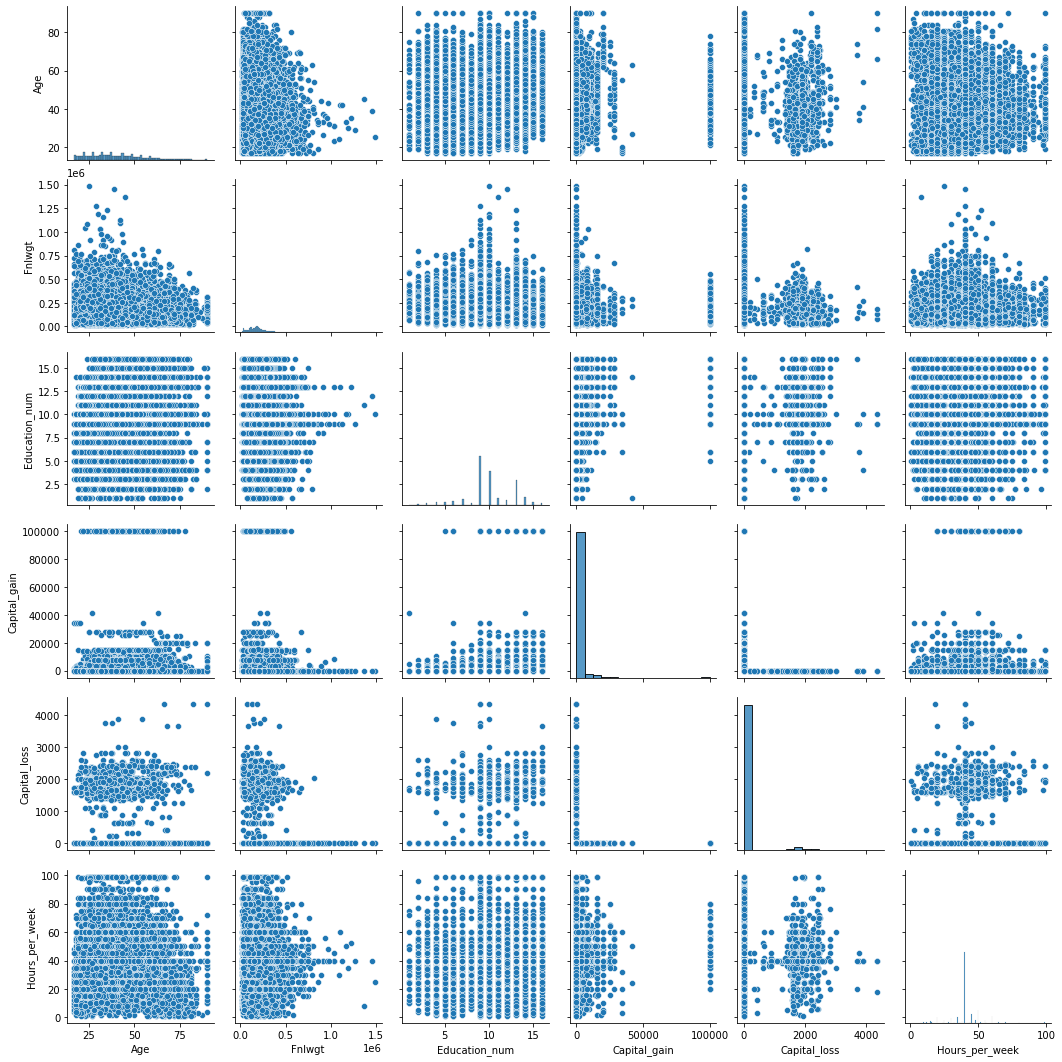

In [19]:
sns.pairplot(df)

we have to convert categorical data into numerical values

In [20]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [21]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [22]:
df.corr()["Income"].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Race              0.071853
Native_country    0.022994
Occupation        0.010777
Fnlwgt           -0.009481
Workclass        -0.048590
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

Education_num is highly correlated with income and Relationship is highly negatively correlated

In [23]:
df.skew()

Age                0.558738
Workclass          0.720049
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.126702
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.236041
Income             1.212383
dtype: float64

we find skewness in some columns so we have to remove it later

<function matplotlib.pyplot.show(close=None, block=None)>

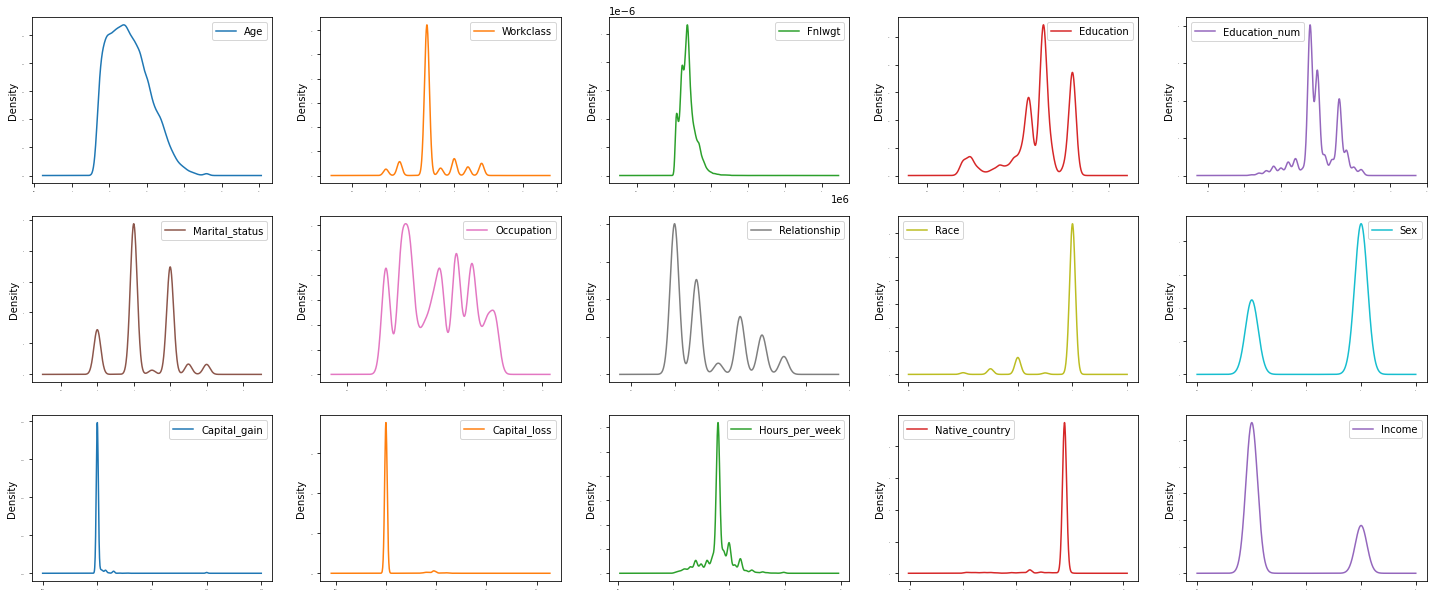

In [24]:
df.plot(kind="density",subplots=True,layout=(7,5),sharex=False,fontsize=1,figsize=(25,25))
plt.show

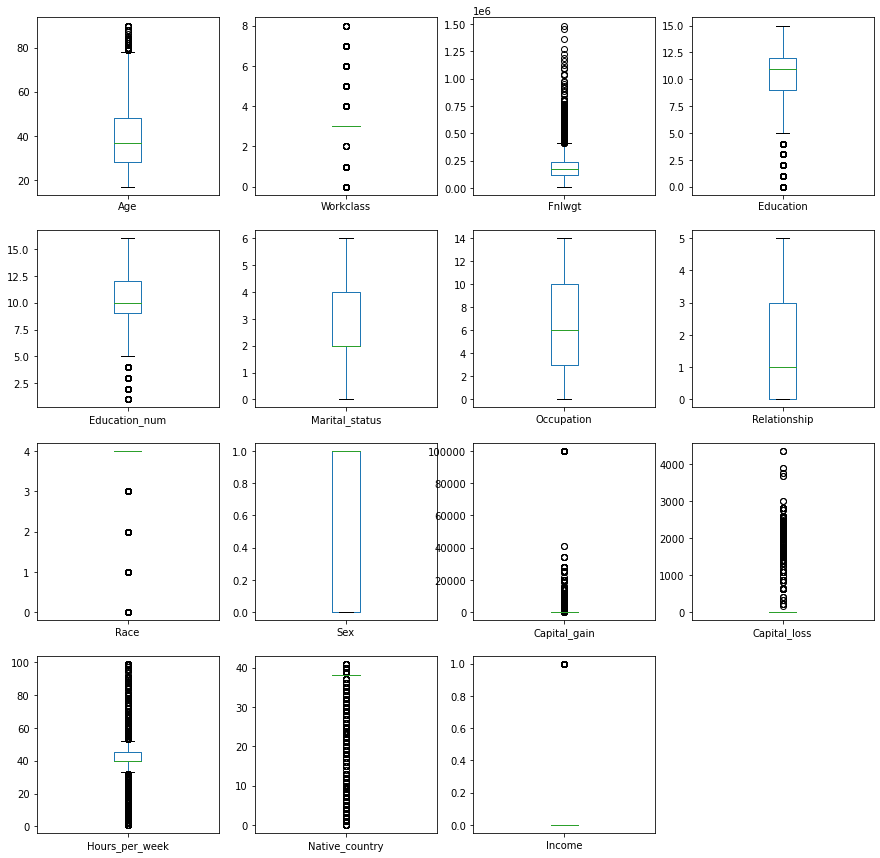

In [25]:
#checking outlier
df.plot(kind='box', figsize=(15,15), layout=(4,4), sharex=False, subplots=True);

we have to remove outlier

In [26]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64),
 array([13, 12,  8, ...,  8,  8,  8], dtype=int64))

In [27]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0.0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0.0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0.0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0,0.0
5,49,3.0,160187,6.0,5,3.0,7.0,1.0,2.0,0.0,0,0,16,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0,0.0
32556,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0,1.0
32557,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0,0.0
32558,22,3.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,0,0,20,38.0,0.0


In [28]:
df_new_z.shape

(27770, 15)

In [29]:
data_loss=((32560-27770)/32560)*100

In [30]:
data_loss

14.71130221130221

In [ ]:
# As our data loss is 14% we can further proceed

In [31]:
df_new=df_new_z

In [32]:
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0.0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0.0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0.0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0,0.0
5,49,3.0,160187,6.0,5,3.0,7.0,1.0,2.0,0.0,0,0,16,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0,0.0
32556,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0,1.0
32557,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0,0.0
32558,22,3.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,0,0,20,38.0,0.0


In [33]:
x=df_new.drop("Income",axis=1)
y=df_new["Income"]

In [34]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x_scaled=sc.fit_transform(x)
x=pd.DataFrame(x_scaled, columns=x.columns)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.187879,Age
1,1.098500,Workclass
2,1.029582,Fnlwgt
3,1.147976,Education
4,1.230832,Education_num
5,1.143046,Marital_status
6,1.098740,Occupation
7,1.677408,Relationship
8,1.047913,Race
9,1.550551,Sex


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [37]:
# To get balanced data set
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x, y)
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

We will try various model to get accuracy

In [38]:
#logisticregression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,roc_curve, roc_auc_score
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Accuracy",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 83.36334173568599
[[4107  222]
 [ 702  523]]
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      4329
         1.0       0.70      0.43      0.53      1225

    accuracy                           0.83      5554
   macro avg       0.78      0.69      0.71      5554
weighted avg       0.82      0.83      0.82      5554



In [39]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  85.50594166366582
[[4021  308]
 [ 497  728]]
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      4329
         1.0       0.70      0.59      0.64      1225

    accuracy                           0.86      5554
   macro avg       0.80      0.76      0.78      5554
weighted avg       0.85      0.86      0.85      5554



In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  83.6694274396831
[[3920  409]
 [ 498  727]]
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      4329
         1.0       0.64      0.59      0.62      1225

    accuracy                           0.84      5554
   macro avg       0.76      0.75      0.76      5554
weighted avg       0.83      0.84      0.83      5554



In [41]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  86.55023406553836
[[4105  224]
 [ 523  702]]
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      4329
         1.0       0.76      0.57      0.65      1225

    accuracy                           0.87      5554
   macro avg       0.82      0.76      0.78      5554
weighted avg       0.86      0.87      0.86      5554



In [42]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  80.86064097947425
[[3750  579]
 [ 484  741]]
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      4329
         1.0       0.56      0.60      0.58      1225

    accuracy                           0.81      5554
   macro avg       0.72      0.74      0.73      5554
weighted avg       0.81      0.81      0.81      5554



In [43]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr, x, y, cv=5)
print("Cross validation score of Logistic Regression model :",scr.mean())

scr=cross_val_score(rfc, x, y, cv=5)
print("Cross validation score of Random Forest model :",scr.mean())

scr=cross_val_score(knn, x, y, cv=5)
print ("Cross validation score of knn model :",scr.mean())
      
scr=cross_val_score(gb, x, y, cv=5)
print ("Cross validation score of gb model :",scr.mean())

scr=cross_val_score(dt, x, y, cv=5)
print ("Cross validation score of dt model :",scr.mean())

Cross validation score of Logistic Regression model : 0.828916096507022
Cross validation score of Random Forest model : 0.8514944184371623
Cross validation score of knn model : 0.8350738206697876
Cross validation score of gb model : 0.8632697155203457
Cross validation score of dt model : 0.8053655023406554


As our random forest classifier performs well so we will be doing hypertuning 

In [44]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt','log2']

max_depth = [int(x) for x in np.linspace(10, 1000,10)]

min_samples_split = [2, 5, 10,14]

min_samples_leaf = [1, 2, 4,6,8]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [45]:
rfc=RandomForestClassifier()
rfc_randomcv=RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [48]:
rfc_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [50]:
rfc_randomcv.best_params_

{'n_estimators': 1800,
 'min_samples_split': 14,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 670,
 'criterion': 'entropy'}

In [52]:
best_random_grid=rfc_randomcv.best_estimator_
best_random_grid

RandomForestClassifier(criterion='entropy', max_depth=670, max_features='sqrt',
                       min_samples_leaf=8, min_samples_split=14,
                       n_estimators=1800)

In [53]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[4102  227]
 [ 520  705]]
Accuracy Score 0.8655023406553836
Classification report:               precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      4329
         1.0       0.76      0.58      0.65      1225

    accuracy                           0.87      5554
   macro avg       0.82      0.76      0.79      5554
weighted avg       0.86      0.87      0.86      5554



In [54]:
auc=roc_auc_score(y_test,y_pred)
auc

0.7615365758222901

In [55]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

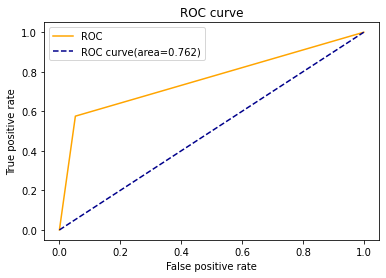

In [56]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      4329
         1.0       0.76      0.58      0.65      1225

    accuracy                           0.87      5554
   macro avg       0.82      0.76      0.79      5554
weighted avg       0.86      0.87      0.86      5554



conclusion--
As our random forest model is getting accuracy of 87% so it is our best model

In [58]:
import pickle
model=RandomForestClassifier()
model.fit(x_train, y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [59]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.85631976953547
